# Terrain Detection to estimate ground area changes via a U-Net for Semantic Segmentation

In [ ]:
#Installing required libraries

In [ ]:
!pip install tensorflow
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
os.chdir(r'/content/drive/MyDrive/LandslideDatasets/')

In [ ]:
#Exploring the dataset
#It has images, masks and DEM

In [ ]:
img_path = r'TrainData/img/image_2022.h5'
mask_path = r'TrainData/mask/mask_2022.h5'

In [ ]:
#Calculate Features of each image

List of keys:  ['img']
Shape of input image:  (128, 128, 14)
Image Vegetation shape:  (128, 128) Image features shape: (1, 128, 128, 3)


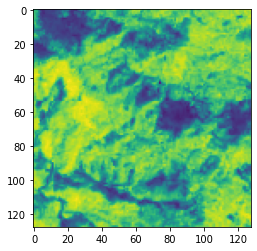

In [ ]:
img_features = np.zeros((1, 128, 128, 3)) #find out what is f_data
with h5py.File(img_path) as hdf:
  key_list = list(hdf.keys()) #returns key or identifier of the image
  print("List of keys: ", key_list)
  img_data = np.array(hdf.get('img'))
  print("Shape of input image: ",img_data.shape)
  plt.imshow(img_data[:, :, 3:0:-1]) #display rgb channel

  img_red_channel = img_data[:,:,3]
  img_green_channel = img_data[:,:,2]
  img_blue_channel = img_data[:,:,1]
  img_nir_channel = img_data[:,:,7] #near infrared wavelength
  img_rgb_channel = img_data[:, :, 3:0:-1]
  #Calculate NDVI i.e. Normalized Difference Vegetation Index of an image
  img_ndvi = np.divide(img_nir_channel  - img_red_channel, np.add(img_nir_channel, img_red_channel))
  img_features[0, :, :, 0] = img_ndvi
  img_features[0, :, :, 1] = img_data[:, :, 12]
  img_features[0, :, :, 2] = img_data[:, :, 13]

  print("Image Vegetation shape: ", img_ndvi.shape, "Image features shape:", img_features.shape)
  plt.imshow(img_ndvi)
  

Key of image ['mask']
input mask shape: (128, 128)


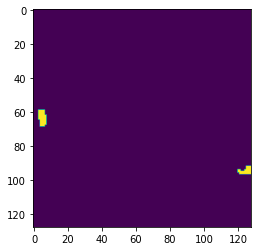

In [ ]:
#show the mask of the image
with h5py.File(mask_path) as hdf:
    mask_keys = list(hdf.keys())
    print("Key of image", mask_keys)
    mask_data = np.array(hdf.get('mask'))
    print("input mask shape:", mask_data.shape)
    plt.imshow(mask_data)

In [ ]:
#Setting the path for images and mask for the entire Train Data
train_img_path = r'TrainData/img/*.h5'
train_mask_path = r'TrainData/mask/*.h5'

In [ ]:
Train_XX = np.zeros((3799, 128, 128, 6)) 
Train_YY = np.zeros((3799, 128, 128, 1)) 

In [ ]:
train_set_images = sorted(glob.glob(train_img_path))
train_set_masks = sorted(glob.glob(train_mask_path))

Now Train with RGB, NDVI, DEM and SLOPE

In [ ]:
#testing googlecolab GPU
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
#Get features for all images in the dataset 

In [ ]:
for i, (img, mask) in enumerate(zip(train_set_images, train_set_masks)):
  print(i, img, mask)
  with h5py.File(img) as hdf:
    key_list = list(hdf.keys()) #returns key or identifier of the image
    #print("List of keys: ", key_list)
    img_data = np.array(hdf.get('img'))
    # assign 0 for the nan value
    img_data[np.isnan(img_data)] = 0.000001

    # to normalize the data
    middle_rgb = img_data[:, :, 1:4].max() / 2.0
    middle_slope = img_data[:, :, 12].max() / 2.0
    middle_elevation = img_data[:, :, 13].max() / 2.0

    img_red_channel = img_data[:,:,3]
    img_green_channel = img_data[:,:,2]
    img_nir_channel = img_data[:,:,7] #near infrared wavelength
    #Calculate NDVI i.e. Normalized Difference Vegetation Index of an image
    img_ndvi = np.divide(img_nir_channel  - img_red_channel, np.add(img_nir_channel, img_red_channel))
    #Calculate ND@I i.e. Normalized Difference Water Index of an image
    img_ndvi = np.divide(img_green_channel  - img_nir_channel, np.add(img_green_channel, img_nir_channel))

    #feature array
    Train_XX[i, :, :, 0] = 1 - img_data[:, :, 3] / middle_rgb #Red band
    Train_XX[i, :, :, 1] = 1 - img_data[:, :, 2] / middle_rgb #Green band
    Train_XX[i, :, :, 2] = 1 - img_data[:, :, 1] / middle_rgb #Blue band
    Train_XX[i, :, :, 3] = img_ndvi #NDVI
    Train_XX[i, :, :, 4] = 1 - img_data[:, :, 12] / middle_slope #Slope
    Train_XX[i, :, :, 5] = 1 - img_data[:, :, 13] / middle_elevation #Elevation

  with h5py.File(mask) as hdf:
    mask_keys = list(hdf.keys())
    mask_data = np.array(hdf.get('mask'))
    Train_YY[i, :, :, 0] = mask_data

0 TrainData/img/image_1.h5 TrainData/mask/mask_1.h5
1 TrainData/img/image_10.h5 TrainData/mask/mask_10.h5
2 TrainData/img/image_100.h5 TrainData/mask/mask_100.h5
3 TrainData/img/image_1000.h5 TrainData/mask/mask_1000.h5
4 TrainData/img/image_1001.h5 TrainData/mask/mask_1001.h5
5 TrainData/img/image_1002.h5 TrainData/mask/mask_1002.h5
6 TrainData/img/image_1003.h5 TrainData/mask/mask_1003.h5
7 TrainData/img/image_1004.h5 TrainData/mask/mask_1004.h5
8 TrainData/img/image_1005.h5 TrainData/mask/mask_1005.h5
9 TrainData/img/image_1006.h5 TrainData/mask/mask_1006.h5
10 TrainData/img/image_1007.h5 TrainData/mask/mask_1007.h5
11 TrainData/img/image_1008.h5 TrainData/mask/mask_1008.h5
12 TrainData/img/image_1009.h5 TrainData/mask/mask_1009.h5
13 TrainData/img/image_101.h5 TrainData/mask/mask_101.h5
14 TrainData/img/image_1010.h5 TrainData/mask/mask_1010.h5
15 TrainData/img/image_1011.h5 TrainData/mask/mask_1011.h5
16 TrainData/img/image_1012.h5 TrainData/mask/mask_1012.h5
17 TrainData/img/imag

<ipython-input-82-49452cbf346f>:25: RuntimeWarning: invalid value encountered in true_divide
  Train_XX[i, :, :, 4] = 1 - img_data[:, :, 12] / middle_slope #Slope


1671 TrainData/img/image_2502.h5 TrainData/mask/mask_2502.h5
1672 TrainData/img/image_2503.h5 TrainData/mask/mask_2503.h5
1673 TrainData/img/image_2504.h5 TrainData/mask/mask_2504.h5
1674 TrainData/img/image_2505.h5 TrainData/mask/mask_2505.h5
1675 TrainData/img/image_2506.h5 TrainData/mask/mask_2506.h5
1676 TrainData/img/image_2507.h5 TrainData/mask/mask_2507.h5
1677 TrainData/img/image_2508.h5 TrainData/mask/mask_2508.h5
1678 TrainData/img/image_2509.h5 TrainData/mask/mask_2509.h5
1679 TrainData/img/image_251.h5 TrainData/mask/mask_251.h5
1680 TrainData/img/image_2510.h5 TrainData/mask/mask_2510.h5
1681 TrainData/img/image_2511.h5 TrainData/mask/mask_2511.h5
1682 TrainData/img/image_2512.h5 TrainData/mask/mask_2512.h5
1683 TrainData/img/image_2513.h5 TrainData/mask/mask_2513.h5
1684 TrainData/img/image_2514.h5 TrainData/mask/mask_2514.h5
1685 TrainData/img/image_2515.h5 TrainData/mask/mask_2515.h5
1686 TrainData/img/image_2516.h5 TrainData/mask/mask_2516.h5
1687 TrainData/img/image_2

<ipython-input-82-49452cbf346f>:18: RuntimeWarning: invalid value encountered in true_divide
  img_ndvi = np.divide(img_nir_channel  - img_red_channel, np.add(img_nir_channel, img_red_channel))


2264 TrainData/img/image_3036.h5 TrainData/mask/mask_3036.h5
2265 TrainData/img/image_3037.h5 TrainData/mask/mask_3037.h5
2266 TrainData/img/image_3038.h5 TrainData/mask/mask_3038.h5
2267 TrainData/img/image_3039.h5 TrainData/mask/mask_3039.h5
2268 TrainData/img/image_304.h5 TrainData/mask/mask_304.h5
2269 TrainData/img/image_3040.h5 TrainData/mask/mask_3040.h5
2270 TrainData/img/image_3041.h5 TrainData/mask/mask_3041.h5
2271 TrainData/img/image_3042.h5 TrainData/mask/mask_3042.h5
2272 TrainData/img/image_3043.h5 TrainData/mask/mask_3043.h5
2273 TrainData/img/image_3044.h5 TrainData/mask/mask_3044.h5
2274 TrainData/img/image_3045.h5 TrainData/mask/mask_3045.h5
2275 TrainData/img/image_3046.h5 TrainData/mask/mask_3046.h5
2276 TrainData/img/image_3047.h5 TrainData/mask/mask_3047.h5
2277 TrainData/img/image_3048.h5 TrainData/mask/mask_3048.h5
2278 TrainData/img/image_3049.h5 TrainData/mask/mask_3049.h5
2279 TrainData/img/image_305.h5 TrainData/mask/mask_305.h5
2280 TrainData/img/image_305

In [ ]:
#Checking minimum and maximum value in Train Data
Train_XX[np.isnan(Train_XX)] = 0.000001
print(Train_XX.min(), Train_XX.max(), Train_YY.min(), Train_YY.max())

-1.0 1.0 0.0 1.0


In [ ]:
#Custom Loss function (Dice Loss)
def dice_loss(y_label, y_pred):
  y_label = tf.cast(y.label, tf.float32)
  y_pred = tf.math.sigmoid(y_label)
  numerator = 2 * tf.reduce_sum(y_label * y_pred)
  denominator = tf.reduce_sum(y_label + y_pred)

  return 1 - numerator / denominator 

Visualization of the training data

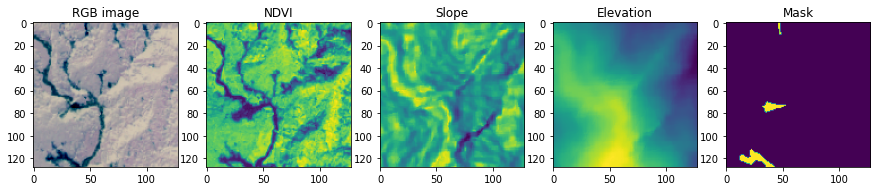

In [ ]:
img_example = 555
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(Train_XX[img_example, :, :, 0:3]) #rgb channel
ax2.imshow(Train_XX[img_example, :, :, 3]) #red band
ax3.imshow(Train_XX[img_example, :, :, 4]) #green channel
ax4.imshow(Train_XX[img_example, :, :, 5]) #blue band
ax5.imshow(Train_YY[img_example, :, :, 0])


Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

#splitting training data into train and test

x_train, x_valid, y_train, y_valid = train_test_split(Train_XX, Train_YY, test_size = 0.2, shuffle=True )

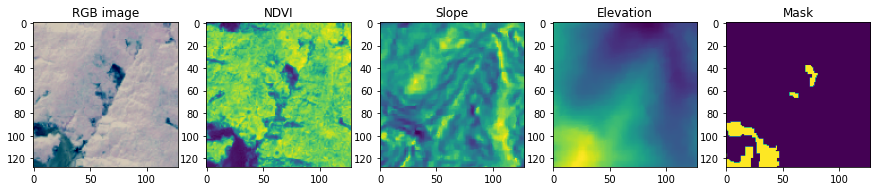

In [ ]:
img_example = 1367
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(Train_XX[img_example, :, :, 0:3]) #rgb channel
ax2.imshow(Train_XX[img_example, :, :, 3]) #red band
ax3.imshow(Train_XX[img_example, :, :, 4]) #green channel
ax4.imshow(Train_XX[img_example, :, :, 5]) #blue band
ax5.imshow(Train_YY[img_example, :, :, 0])


In [ ]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

## Create custom metrics for the model

In [ ]:
#define performance metrics

import tensorflow as tf
from tensorflow.keras import backend as K

# recall 
def recall_metric(y_label, y_pred):
    true_positives = K.sum(K.round(K.clip(y_label * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_label, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_metric(y_label, y_pred):
    true_positives = K.sum(K.round(K.clip(y_label * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_metric(y_label, y_pred):
    precision = precision_metric(y_label, y_pred)
    recall = recall_metric(y_label, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Unet model with 5 layers in contraction path and 4 layers in expansive path with 'relu' activation, binary_crossentropy loss and adam optimizer 

In [ ]:

def unet_model(img_width, img_height, img_channels):
  inputs = tf.keras.layers.Input((img_width, img_height, img_channels))

  #CONTRACTION PATH 
  c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs) #he-normal statistical distribution or function to use for initialising the weights
  c1 = tf.keras.layers.Dropout(0.1)(c1)
  c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
  p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

  c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1) #he-normal  statistical distribution or function to use for initialising the weights
  c2 = tf.keras.layers.Dropout(0.1)(c2)
  c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
  p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

  c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2) #he-normal  statistical distribution or function to use for initialising the weights
  c3 = tf.keras.layers.Dropout(0.2)(c3)
  c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
  p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

  c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3) #he-normal  statistical distribution or function to use for initialising the weights
  c4 = tf.keras.layers.Dropout(0.2)(c4)
  c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
  p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

  c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
  c5 = tf.keras.layers.Dropout(0.3)(c5)
  c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

  #EXPANSIVE PATH
  u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
  u6 = tf.keras.layers.concatenate([u6, c4])
  c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
  c6 = tf.keras.layers.Dropout(0.2)(c6)
  c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
  
  u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
  u7 = tf.keras.layers.concatenate([u7, c3])
  c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
  c7 = tf.keras.layers.Dropout(0.2)(c7)
  c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
  
  u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
  u8 = tf.keras.layers.concatenate([u8, c2])
  c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
  c8 = tf.keras.layers.Dropout(0.1)(c8)
  c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

  u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
  u9 = tf.keras.layers.concatenate([u9, c1])
  c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
  c9 = tf.keras.layers.Dropout(0.1)(c9)
  c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

  outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

  model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_metric, precision_metric, recall_metric])
  
  tf.keras.utils.plot_model(model, show_shapes=True)
  return model

In [ ]:
model = unet_model(128, 128, 6)
model.summary()

checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_metric", verbose=1, save_best_only=True, mode="max")

callbacks = [
    checkpointer
]

history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=2, validation_data=(x_valid, y_valid), callbacks=callbacks)

model.save("model_save.h5")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 128, 128, 16  880         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_6 (Dropout)            (None, 128, 128, 16  0           ['conv2d_11[0][0]']              
                                )                                                             

190/190 - 593s - loss: 0.0737 - accuracy: 0.9734 - f1_metric: 0.0150 - precision_metric: 0.5753 - recall_metric: 0.0114 - val_loss: 0.0513 - val_accuracy: 0.9755 - val_f1_metric: 0.0518 - val_precision_metric: 0.7740 - val_recall_metric: 0.0269 - 593s/epoch - 3s/step
Epoch 2/10


190/190 - 580s - loss: 0.0475 - accuracy: 0.9807 - f1_metric: 0.3382 - precision_metric: 0.7465 - recall_metric: 0.2532 - val_loss: 0.0463 - val_accuracy: 0.9822 - val_f1_metric: 0.5791 - val_precision_metric: 0.7020 - val_recall_metric: 0.5093 - 580s/epoch - 3s/step
Epoch 3/10


190/190 - 577s - loss: 0.0431 - accuracy: 0.9838 - f1_metric: 0.5666 - precision_metric: 0.6937 - recall_metric: 0.5094 - val_loss: 0.0459 - val_accuracy: 0.9818 - val_f1_metric: 0.6409 - val_precision_metric: 0.6165 - val_recall_metric: 0.6847 - 577s/epoch - 3s/step
Epoch 4/10


190/190 - 575s - loss: 0.0392 - accuracy: 0.9850 - f1_metric: 0.5949 - precision_metric: 0.7257 - recall_metric: 0.5274 - val_loss: 0.0372 - val_accuracy: 0.9856 - val_f1_metric: 0.6675 - val_precision_metric: 0.7304 - val_recall_metric: 0.6204 - 575s/epoch - 3s/step
Epoch 5/10


190/190 - 581s - loss: 0.0370 - accuracy: 0.9859 - f1_metric: 0.6207 - precision_metric: 0.7464 - recall_metric: 0.5472 - val_loss: 0.0370 - val_accuracy: 0.9857 - val_f1_metric: 0.6743 - val_precision_metric: 0.7350 - val_recall_metric: 0.6278 - 581s/epoch - 3s/step
Epoch 6/10


190/190 - 579s - loss: 0.0360 - accuracy: 0.9861 - f1_metric: 0.6281 - precision_metric: 0.7517 - recall_metric: 0.5564 - val_loss: 0.0363 - val_accuracy: 0.9861 - val_f1_metric: 0.6592 - val_precision_metric: 0.7917 - val_recall_metric: 0.5698 - 579s/epoch - 3s/step
Epoch 7/10


190/190 - 577s - loss: 0.0355 - accuracy: 0.9862 - f1_metric: 0.6335 - precision_metric: 0.7613 - recall_metric: 0.5581 - val_loss: 0.0370 - val_accuracy: 0.9851 - val_f1_metric: 0.6871 - val_precision_metric: 0.6878 - val_recall_metric: 0.6925 - 577s/epoch - 3s/step
Epoch 8/10


190/190 - 583s - loss: 0.0340 - accuracy: 0.9868 - f1_metric: 0.6463 - precision_metric: 0.7647 - recall_metric: 0.5740 - val_loss: 0.0352 - val_accuracy: 0.9863 - val_f1_metric: 0.6756 - val_precision_metric: 0.7782 - val_recall_metric: 0.6014 - 583s/epoch - 3s/step
Epoch 9/10


190/190 - 598s - loss: 0.0347 - accuracy: 0.9866 - f1_metric: 0.6438 - precision_metric: 0.7636 - recall_metric: 0.5724 - val_loss: 0.0359 - val_accuracy: 0.9861 - val_f1_metric: 0.6972 - val_precision_metric: 0.7237 - val_recall_metric: 0.6772 - 598s/epoch - 3s/step
Epoch 10/10


190/190 - 670s - loss: 0.0338 - accuracy: 0.9867 - f1_metric: 0.6492 - precision_metric: 0.7661 - recall_metric: 0.5793 - val_loss: 0.0336 - val_accuracy: 0.9867 - val_f1_metric: 0.6851 - val_precision_metric: 0.7775 - val_recall_metric: 0.6174 - 670s/epoch - 4s/step


### Evaluation of model metrics

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.03356515243649483 0.9866776466369629 0.6928379535675049 0.7853184342384338 0.6222373843193054


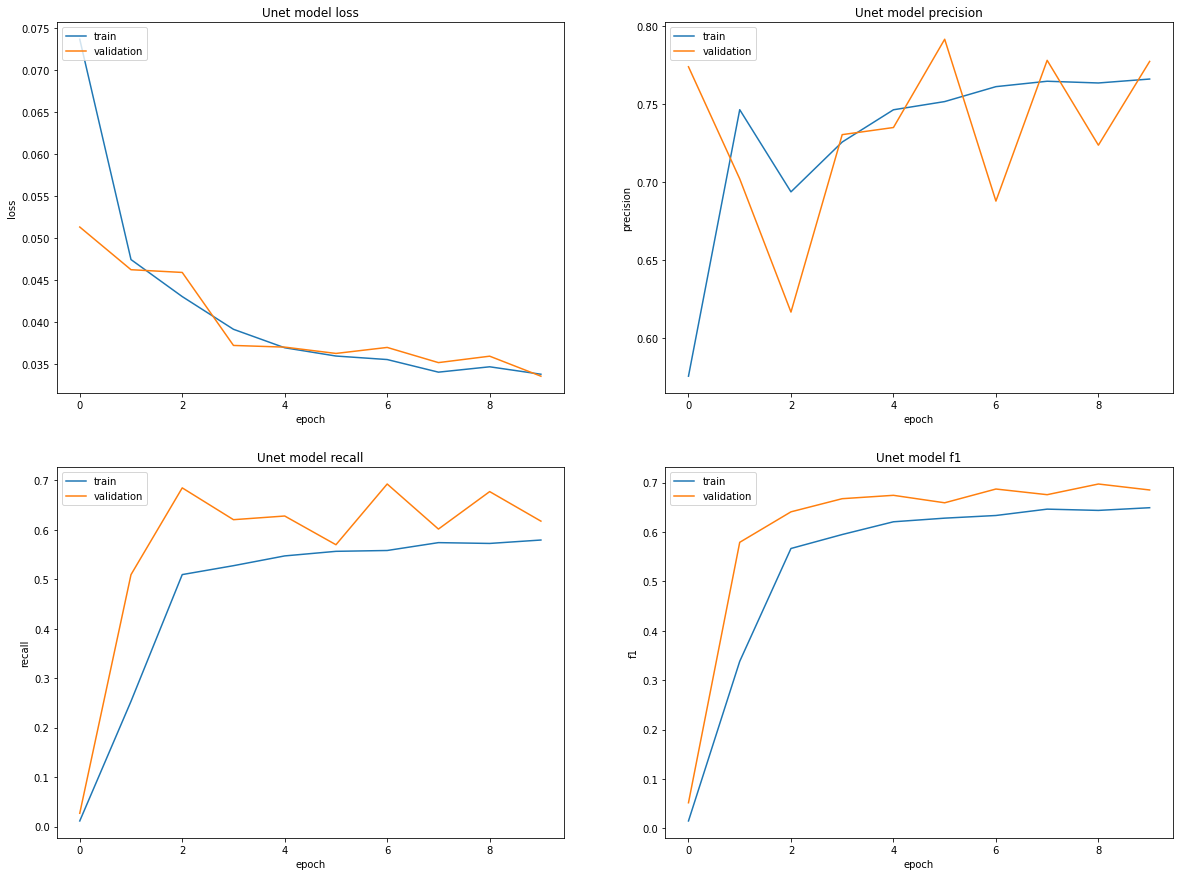

In [ ]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_metric'])
ax12.plot(history.history['val_precision_metric'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_metric'])
ax13.plot(history.history['val_recall_metric'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_metric'])
ax14.plot(history.history['val_f1_metric'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')


### Perform prediction on validation set

In [ ]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)


24/24 [==============================] - 29s 1s/step


In [ ]:
#using saved best model 
threshold = 0.5
pred_img = best_model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 [==============================] - 49s 2s/step


### Visualize the predictions

In [ ]:
img = 2 

Text(0.5, 1.0, 'Training Image')

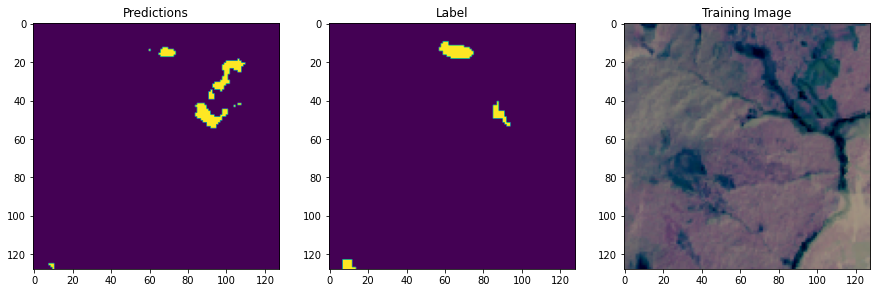

In [ ]:
img = 2
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')


Text(0.5, 1.0, 'Training Image')

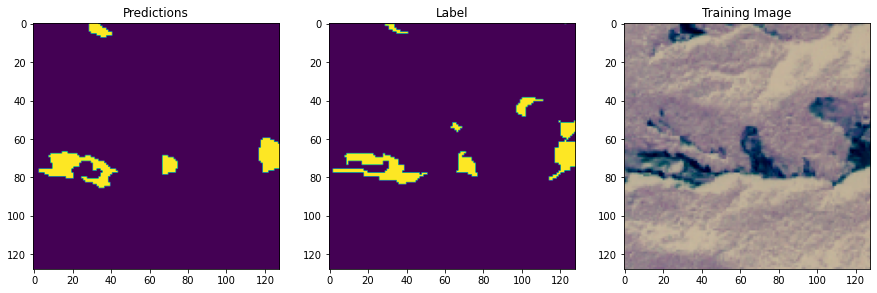

In [ ]:
img = 99
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')


Text(0.5, 1.0, 'Training Image')

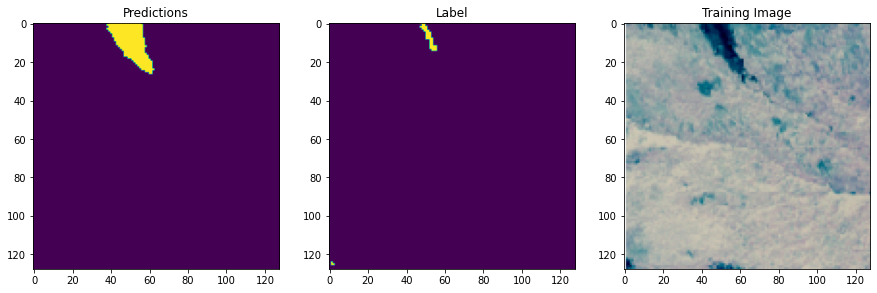

In [ ]:
img = 290
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

Text(0.5, 1.0, 'Training Image')

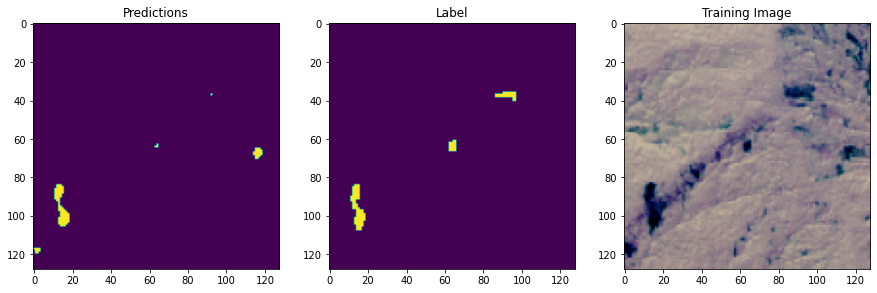

In [ ]:
img = 189
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

### Now perform calculation of area of connected pixels in the contour mask shape. 

In [ ]:
import cv2

img = 189
ret,thresh = cv2.threshold(pred_img[img,:,:,0],127,255,0)
contours,hierarchy = cv2.findContours(pred_img[img,:,:,0], 1, 2)

cnt = contours[0]
area_px = cv2.contourArea(cnt)
print("Area of contour in mask i.e. area of landslide is:", area_px)

Area of contour in mask i.e. area of landslide is: 488.0


### Now perform prediction on Test Set which we have used along with the original Validation set from the Landslide2sense Challenge dataset in order to validate our test predictions

#### Load and get features

In [ ]:
test_url = r'/content/drive/MyDrive/LandslideDatasets/ValidData/image_*.h5'
img_val = sorted(glob.glob(test_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
  print(i, img)
  mask_name.append(img.split('/')[-1].replace('image', 'mask'))
  with h5py.File(img) as hdf:
    key_list = list(hdf.keys()) #returns key or identifier of the image
    #print("List of keys: ", key_list)
    img_data_v = np.array(hdf.get('img'))
    # assign 0 for the nan value
    img_data_v[np.isnan(img_data)] = 0.000001

    # to normalize the data
    middle_rgb_v = img_data_v[:, :, 1:4].max() / 2.0
    middle_slope_v = img_data_v[:, :, 12].max() / 2.0
    middle_elevation_v = img_data_v[:, :, 13].max() / 2.0

    img_red_channel_v = img_data_v[:,:,3]
    img_nir_channel_v = img_data_v[:,:,7] #near infrared wavelength
    #Calculate NDVI i.e. Normalized Difference Vegetation Index of an image
    img_ndvi_v = np.divide(img_nir_channel_v  - img_red_channel_v, np.add(img_nir_channel_v, img_red_channel_v))

    #feature array
    VAL_XX[i, :, :, 0] = 1 - img_data_v[:, :, 3] / middle_rgb_v #Red band
    VAL_XX[i, :, :, 1] = 1 - img_data_v[:, :, 2] / middle_rgb_v #Green band
    VAL_XX[i, :, :, 2] = 1 - img_data_v[:, :, 1] / middle_rgb_v #Blue band
    VAL_XX[i, :, :, 3] = img_ndvi_v #NDVI
    VAL_XX[i, :, :, 4] = 1 - img_data_v[:, :, 12] / middle_slope_v #Slope
    VAL_XX[i, :, :, 5] = 1 - img_data_v[:, :, 13] / middle_elevation_v #Elevation



0 /content/drive/MyDrive/LandslideDatasets/ValidData/image_1.h5
1 /content/drive/MyDrive/LandslideDatasets/ValidData/image_10.h5
2 /content/drive/MyDrive/LandslideDatasets/ValidData/image_100.h5
3 /content/drive/MyDrive/LandslideDatasets/ValidData/image_101.h5
4 /content/drive/MyDrive/LandslideDatasets/ValidData/image_102.h5
5 /content/drive/MyDrive/LandslideDatasets/ValidData/image_103.h5
6 /content/drive/MyDrive/LandslideDatasets/ValidData/image_104.h5
7 /content/drive/MyDrive/LandslideDatasets/ValidData/image_105.h5
8 /content/drive/MyDrive/LandslideDatasets/ValidData/image_106.h5
9 /content/drive/MyDrive/LandslideDatasets/ValidData/image_107.h5
10 /content/drive/MyDrive/LandslideDatasets/ValidData/image_108.h5
11 /content/drive/MyDrive/LandslideDatasets/ValidData/image_109.h5
12 /content/drive/MyDrive/LandslideDatasets/ValidData/image_11.h5
13 /content/drive/MyDrive/LandslideDatasets/ValidData/image_110.h5
14 /content/drive/MyDrive/LandslideDatasets/ValidData/image_111.h5
15 /conte

<ipython-input-32-152cc13bd36b>:24: RuntimeWarning: invalid value encountered in true_divide
  img_ndvi_v = np.divide(img_nir_channel_v  - img_red_channel_v, np.add(img_nir_channel_v, img_red_channel_v))


172 /content/drive/MyDrive/LandslideDatasets/ValidData/image_33.h5
173 /content/drive/MyDrive/LandslideDatasets/ValidData/image_34.h5
174 /content/drive/MyDrive/LandslideDatasets/ValidData/image_35.h5
175 /content/drive/MyDrive/LandslideDatasets/ValidData/image_36.h5
176 /content/drive/MyDrive/LandslideDatasets/ValidData/image_37.h5
177 /content/drive/MyDrive/LandslideDatasets/ValidData/image_38.h5
178 /content/drive/MyDrive/LandslideDatasets/ValidData/image_39.h5
179 /content/drive/MyDrive/LandslideDatasets/ValidData/image_4.h5
180 /content/drive/MyDrive/LandslideDatasets/ValidData/image_40.h5
181 /content/drive/MyDrive/LandslideDatasets/ValidData/image_41.h5
182 /content/drive/MyDrive/LandslideDatasets/ValidData/image_42.h5
183 /content/drive/MyDrive/LandslideDatasets/ValidData/image_43.h5
184 /content/drive/MyDrive/LandslideDatasets/ValidData/image_44.h5
185 /content/drive/MyDrive/LandslideDatasets/ValidData/image_45.h5
186 /content/drive/MyDrive/LandslideDatasets/ValidData/image_46

### Performing prediction on the test set

8/8 [==============================] - 10s 1s/step


Text(0.5, 1.0, 'Training Image')

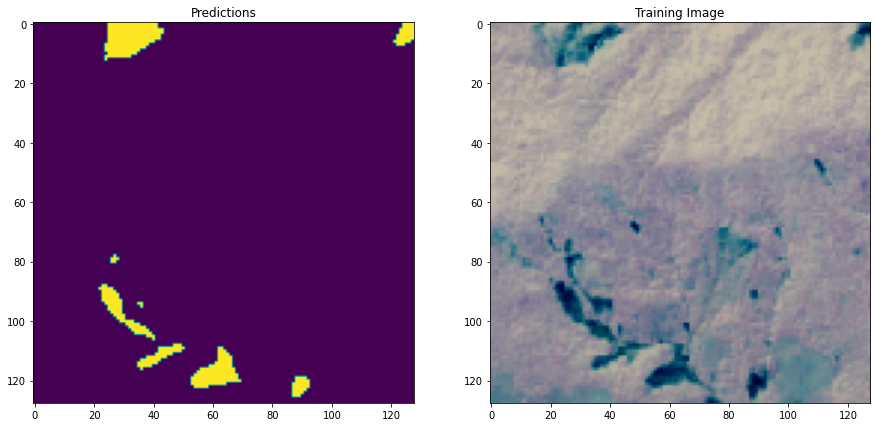

In [ ]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape


img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Image')


### Prediction on high-vegetation image yielded bad prediction

Text(0.5, 1.0, 'Image')

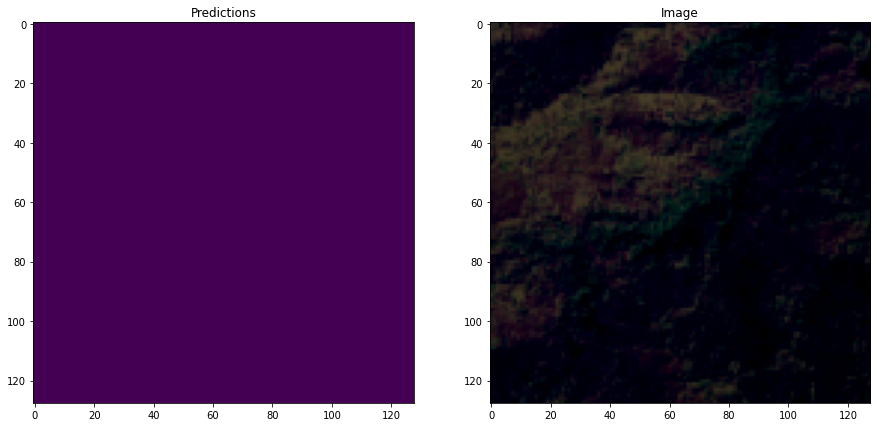

In [ ]:
img = 123
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Image')

Text(0.5, 1.0, 'Image')

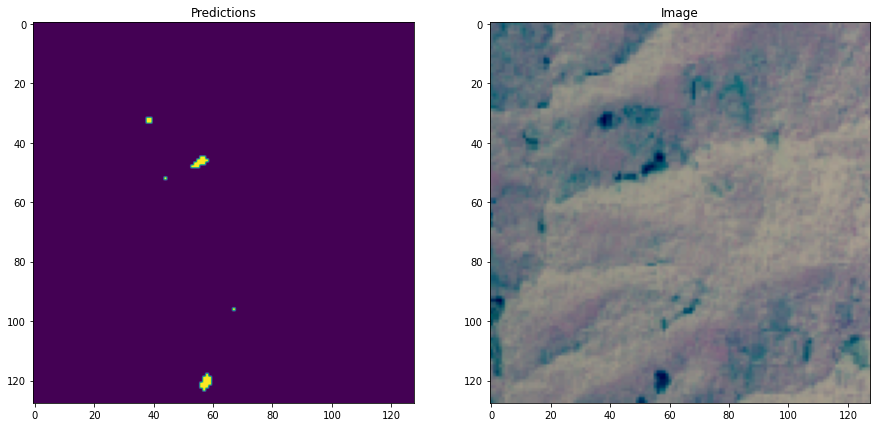

In [ ]:
img = 90
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Image')

### Save predictions into a directory

In [ ]:
write_directory = r'/content/drive/MyDrive/LandslideDatasets/ValidData/mask'
for i, name in enumerate(mask_name):
  h5f = h5py.File(write_directory + "/" + name, 'w')
  # change the dimention of prediction to (n, 128, 128)
  pred_mask = pred_img[i, :, :, 0]

  # write to the directory
  h5f.create_dataset('mask', data = pred_mask)
  h5f.close()

#### Test on Waterbodies dataset that contains images of 89 lakes in the China-Pakistan Economic Corridor

In [ ]:
#Waterbodies dataset 
waterbodies_url = r'/content/drive/MyDrive/WaterBodiesDataset/Images/water_body_*.jpg'
img_water = sorted(glob.glob(waterbodies_url))
waterbodies_masks_url = r'/content/drive/MyDrive/WaterBodiesDataset/Masks/water_body_*.jpg'
mask_water = sorted(glob.glob(waterbodies_masks_url))
Water_XX = np.zeros((245, 128, 128, 6))
Water_YY = np.zeros((245, 128, 128, 1))
mask_name = []
for i, img in enumerate(img_water):
  print(i, img)
  img_data_w = cv2.imread(img) #.astype(np.float)
  #convert bgr to rgb
  img_data_w = cv2.cvtColor(img_data_w, cv2.COLOR_BGR2RGB)
  #resize
  dim = (128, 128)
  img_data_w = cv2.resize(img_data_w, dim, interpolation = cv2.INTER_AREA)
  mask_name.append(img.split('/')[-1].replace('image', 'mask'))
  if i < 245:
    # assign 0 for the nan value
    img_data_w[np.isnan(img_data_w)] = 0.000001

    # to normalize the data
    middle_rgb_w = img_data_w[:, :, 1:4].max() / 2.0

    img_nir_channel_w = img_data_w[:,:,7] #near infrared wavelength
    img_green_channel_w = img_data_w[:,:,2] #green band
    # Calculate NDWI i.e. Normalized Difference Water Index of an image
    img_ndwi = np.divide(img_green_channel_w  - img_nir_channel_w, np.add(img_green_channel_w, img_nir_channel_w))

    #feature array
    Water_XX[i, :, :, 0] = 1 - img_data_w[:, :, 0] / middle_rgb_w #Red band
    Water_XX[i, :, :, 1] = 1 - img_data_w[:, :, 1] / middle_rgb_w #Green band
    Water_XX[i, :, :, 2] = 1 - img_data_w[:, :, 2] / middle_rgb_w #Blue band
    Water_XX[i, :, :, 3] = img_ndwi #NDWI

  if i == 245:
    break

0 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1.jpg
1 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_10.jpg
2 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_100.jpg
3 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1000.jpg
4 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1002.jpg
5 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1003.jpg
6 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1004.jpg
7 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1006.jpg
8 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1008.jpg
9 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_101.jpg
10 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1010.jpg
11 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1011.jpg
12 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1014.jpg
13 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1015.jpg
14 /conte

<ipython-input-65-ebfd96b2b5c2>:38: RuntimeWarning: invalid value encountered in true_divide
  Water_XX[i, :, :, 0] = 1 - img_data_w[:, :, 0] / middle_rgb_w #Red band
<ipython-input-65-ebfd96b2b5c2>:39: RuntimeWarning: invalid value encountered in true_divide
  Water_XX[i, :, :, 1] = 1 - img_data_w[:, :, 1] / middle_rgb_w #Green band
<ipython-input-65-ebfd96b2b5c2>:40: RuntimeWarning: invalid value encountered in true_divide
  Water_XX[i, :, :, 2] = 1 - img_data_w[:, :, 2] / middle_rgb_w #Blue band


21 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1024.jpg
22 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1026.jpg
23 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1027.jpg
24 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1028.jpg
25 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1029.jpg
26 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_103.jpg
27 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1030.jpg
28 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1031.jpg
29 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1033.jpg
30 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1034.jpg
31 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1036.jpg
32 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1037.jpg
33 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_1039.jpg
34 /content/drive/MyDrive/WaterBodiesDataset/Images/water_body_10

## Using the Best Model previously saved from training

In [ ]:
from tensorflow import keras
best_model = keras.models.load_model('/content/drive/MyDrive/LandslideDatasets/model_save.h5', custom_objects={"f1_metric": f1_metric, "precision_metric": precision_metric, "recall_metric": recall_metric})


In [ ]:
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 128, 128, 16  880         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_6 (Dropout)            (None, 128, 128, 16  0           ['conv2d_11[0][0]']              
                                )                                                             

In [ ]:
threshold = 0.5
pred_img_w = best_model.predict(Water_XX)
pred_img_w = (pred_img_w > threshold).astype(np.uint8)
pred_img_w.shape

8/8 [==============================] - 10s 1s/step


(245, 128, 128, 1)

Text(0.5, 1.0, 'Prediction')

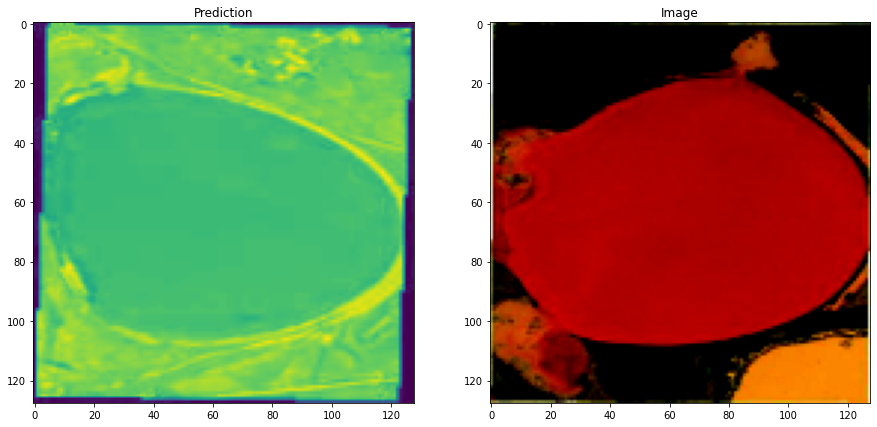

In [ ]:
img = 10
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax2.imshow(Water_XX[img, :, :, 0:3])
ax2.set_title('Image')
ax1.imshow(pred_img_w[img, :, :, 0])
ax1.set_title("Prediction")


---End of Notebook---